In [ ]:
pip install --upgrade pymupdf

In [ ]:
pip install opencv-python

In [ ]:
pip install pytesseract

In [ ]:
pip install xlsxwriter

In [ ]:
import fitz
import cv2
from google.colab.patches import cv2_imshow
import xlsxwriter

In [ ]:
doc = fitz.open('Task1.pdf')
print(doc.page_count)

230


In [ ]:
# insert the page number to detect
page = doc.load_page(11)
pix = page.get_pixmap()
pix.save(f"page-{page.number}.png")

In [ ]:
base_image = cv2.imread(f"page-{page.number}.png")

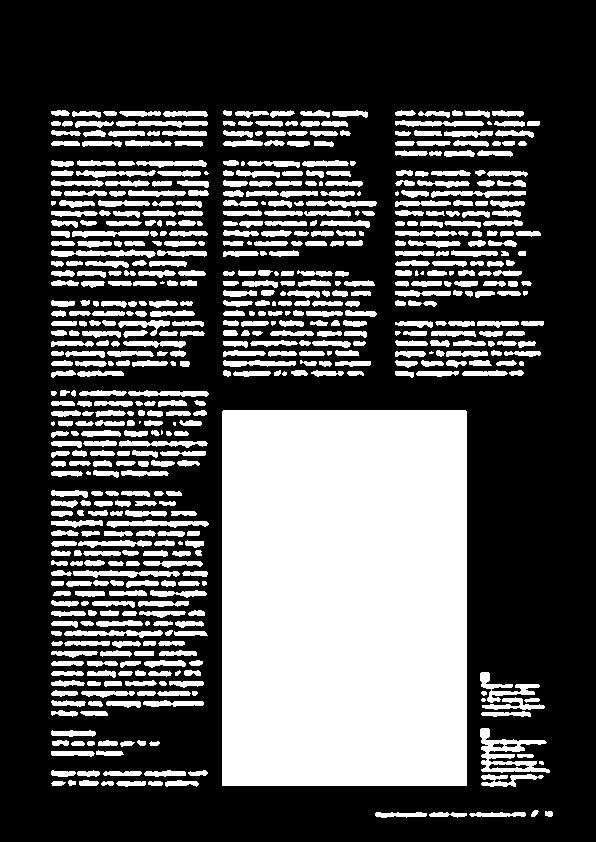

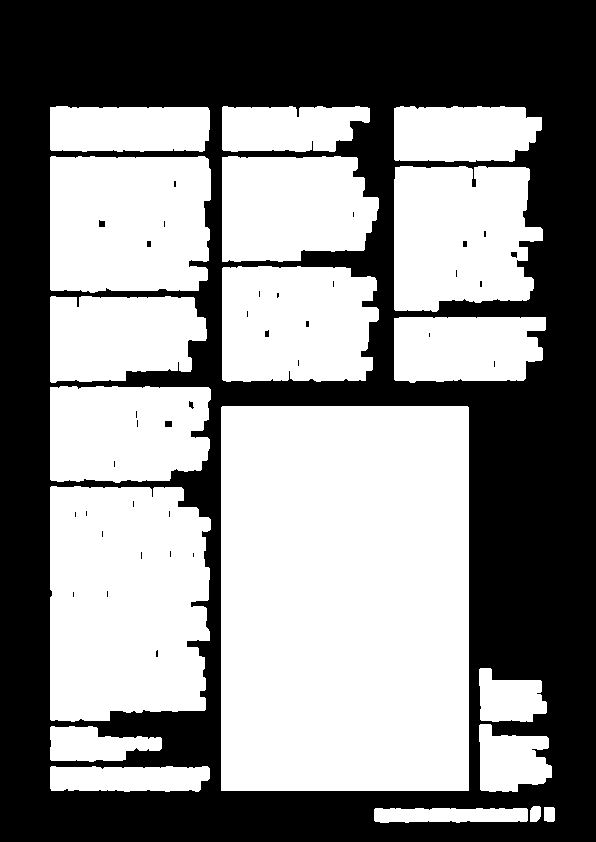

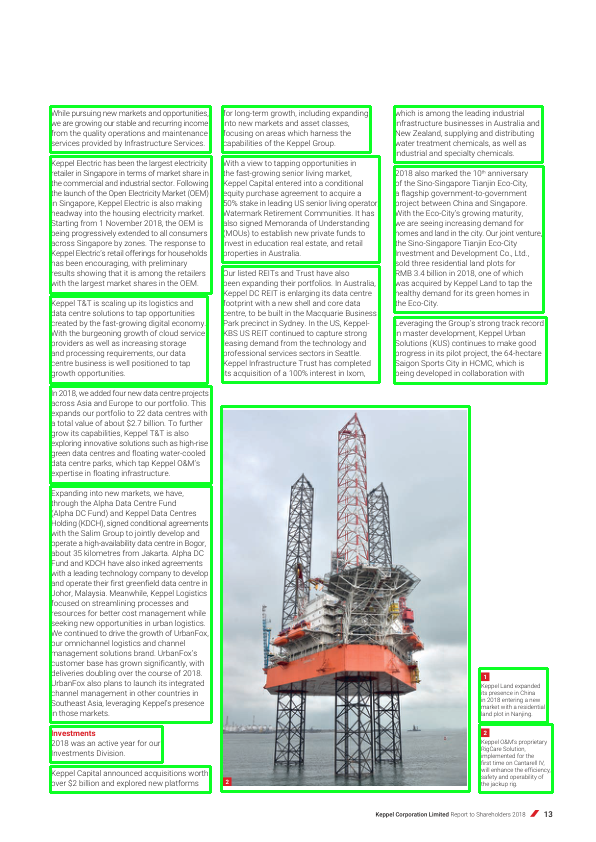

In [ ]:
# preprocessing for contour detection
image = cv2.imread(f"page-{page.number}.png")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)
blur = cv2.GaussianBlur(gray, (7,7), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Create rectangular structuring element and dilate
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4,10))
dilate = cv2.dilate(thresh, kernel, iterations=1)

# Find contours and draw rectangle
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cnts = cnts[0] if len(cnts) == 2 else cnts[1]
index = 0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    # remove footers and single lines
    if h > 20:
      index += 1
      roi = image[y:y+h, x:x+h]
      filename = "data/contour_image" + str(index)+  ".png"
      cv2.imwrite(filename, roi)
      cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)

cv2_imshow(thresh)
cv2_imshow(dilate)
cv2_imshow(image)

In [ ]:
page.get_textbox(fitz.Rect())

''

In [ ]:
def get_contour_tl(contour):
    x, y, _, _ = cv2.boundingRect(contour)
    return (x, y)

# Sort contours based on their top-left corner coordinates
sorted_cnts = sorted(cnts, key=get_contour_tl)




In [ ]:
import pandas as pd

df = pd.DataFrame(columns=['Paragraphs'])

In [ ]:
# Printing sorted contours based on top-left corner coordinates
for contour in sorted_cnts:
    x, y, w, h = cv2.boundingRect(contour)
    textbox = page.get_textbox(fitz.Rect(x,y,x+w,y+h))
    if h > 20 and len(textbox) > 10:
      new_row = {'Paragraphs': textbox}
      df = df.append(new_row, ignore_index=True)
      print(textbox)
      print()
    # print(f"({x},{y})")

<ipython-input-62-b0dd5a1bd1e0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
<ipython-input-62-b0dd5a1bd1e0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
<ipython-input-62-b0dd5a1bd1e0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


While pursuing new markets and opportunities, 
we are growing our stable and recurring income 
from the quality operations and maintenance 
services provided by Infrastructure Services. 

Keppel Electric has been the largest electricity 
retailer in Singapore in terms of market share in 
the commercial and industrial sector. Following 
the launch of the Open Electricity Market (OEM) 
in Singapore, Keppel Electric is also making 
headway into the housing electricity market. 
Starting from 1 November 2018, the OEM is 
being progressively extended to all consumers 
across Singapore by zones. The response to 
Keppel Electric’s retail offerings for households 
has been encouraging, with preliminary 
results showing that it is among the retailers 
with the largest market shares in the OEM. 

Keppel T&T is scaling up its logistics and 
data centre solutions to tap opportunities 
created by the fast-growing digital economy. 
With the burgeoning growth of cloud service 
providers as well as inc

<ipython-input-62-b0dd5a1bd1e0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
<ipython-input-62-b0dd5a1bd1e0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
<ipython-input-62-b0dd5a1bd1e0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


In 2018, we added four new data centre projects 
across Asia and Europe to our portfolio. This 
expands our portfolio to 22 data centres with 
a total value of about $2.7 billion. To further 
grow its capabilities, Keppel T&T is also 
exploring innovative solutions such as high-rise 
green data centres and floating water-cooled 
data centre parks, which tap Keppel O&M’s 
expertise in floating infrastructure.

Expanding into new markets, we have, 
through the Alpha Data Centre Fund 
(Alpha DC Fund) and Keppel Data Centres 
Holding (KDCH), signed conditional agreements 
with the Salim Group to jointly develop and 
operate a high-availability data centre in Bogor, 
about 35 kilometres from Jakarta. Alpha DC 
Fund and KDCH have also inked agreements 
with a leading technology company to develop 
and operate their first greenfield data centre in 
Johor, Malaysia. Meanwhile, Keppel Logistics 
focused on streamlining processes and 
resources for better cost management while 
seeking new oppor

<ipython-input-62-b0dd5a1bd1e0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
<ipython-input-62-b0dd5a1bd1e0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
<ipython-input-62-b0dd5a1bd1e0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
<ipython-input-62-b0dd5a1bd1e0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Keppel Capital announced acquisitions worth 
over $2 billion and explored new platforms 

for long-term growth, including expanding 
into new markets and asset classes, 
focusing on areas which harness the 
capabilities of the Keppel Group. 

With a view to tapping opportunities in 
the fast-growing senior living market, 
Keppel Capital entered into a conditional 
equity purchase agreement to acquire a 
50% stake in leading US senior living operator,
Watermark Retirement Communities. It has 
also signed Memoranda of Understanding 
(MOUs) to establish new private funds to 
invest in education real estate, and retail 
properties in Australia. 

Our listed REITs and Trust have also 
been expanding their portfolios. In Australia, 
Keppel DC REIT is enlarging its data centre 
footprint with a new shell and core data 
centre, to be built in the Macquarie Business 
Park precinct in Sydney. In the US, Keppel-
KBS US REIT continued to capture strong 
leasing demand from the technology and 
prof

<ipython-input-62-b0dd5a1bd1e0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
<ipython-input-62-b0dd5a1bd1e0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
<ipython-input-62-b0dd5a1bd1e0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
<ipython-input-62-b0dd5a1bd1e0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
<ipython-input-62-b0dd5a1bd1e0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

In [ ]:
excel_filename = 'result_assign1.xlsx'
df.to_excel(excel_filename, index=False)